In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
file_path = "/content/drive/My Drive/DS203/master.csv"

df = pd.read_csv(file_path)
display(df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [8]:
print("Number of records = "+str(df.shape[0]))
print("Number of columns = "+str(df.shape[1]))


Number of records = 27820
Number of columns = 12


In [9]:
print(df.dtypes)

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object


In [10]:
for col in df.columns.values:
  unique = pd.unique(df[col])
  print("\u2022 The " + col+ " is of type " +str(df[col].dtypes) + " and has " + str(len(unique)) + " unique values" )
  if len(unique) < 10:
    print("\tThe values taken by " + col + " are:")
    print("\t",end = "")
    for i,x in enumerate(unique):
      if i==len(unique)-1:
        print(x)
        continue
      print(x,end = ", ")

• The country is of type object and has 101 unique values
• The year is of type int64 and has 32 unique values
• The sex is of type object and has 2 unique values
	The values taken by sex are:
	male, female
• The age is of type object and has 6 unique values
	The values taken by age are:
	15-24 years, 35-54 years, 75+ years, 25-34 years, 55-74 years, 5-14 years
• The suicides_no is of type int64 and has 2084 unique values
• The population is of type int64 and has 25564 unique values
• The suicides/100k pop is of type float64 and has 5298 unique values
• The country-year is of type object and has 2321 unique values
• The HDI for year is of type float64 and has 306 unique values
• The  gdp_for_year ($)  is of type object and has 2321 unique values
• The gdp_per_capita ($) is of type int64 and has 2233 unique values
• The generation is of type object and has 6 unique values
	The values taken by generation are:
	Generation X, Silent, G.I. Generation, Boomers, Millenials, Generation Z


Based on the information about the number of unique values and data type we can conclude the following 

In [11]:
#finding the number of missing variables

print("Columns | Missing values")
for col in df.columns.values:
  print(col +"\t"+ str(np.sum(pd.isnull(df[col]))) )

Columns | Missing values
country	0
year	0
sex	0
age	0
suicides_no	0
population	0
suicides/100k pop	0
country-year	0
HDI for year	19456
 gdp_for_year ($) 	0
gdp_per_capita ($)	0
generation	0


In [12]:
#Since there are many missing values in HDI for year, I have checked the non zero values for more clarity
print(df[['HDI for year','country','year']].loc[pd.notnull(df['HDI for year'])])

       HDI for year     country  year
72            0.619     Albania  1995
73            0.619     Albania  1995
74            0.619     Albania  1995
75            0.619     Albania  1995
76            0.619     Albania  1995
...             ...         ...   ...
27815         0.675  Uzbekistan  2014
27816         0.675  Uzbekistan  2014
27817         0.675  Uzbekistan  2014
27818         0.675  Uzbekistan  2014
27819         0.675  Uzbekistan  2014

[8364 rows x 3 columns]


Based on our observations we can conclude the following about the type of our variable


1.   Country : Categorical
2.   Year : temporal
3.   sex : Categorical
4.   age : ordinal
5.   suicides_no : numerical(integer)
6.   population : numerical (integer)
7.   suicides/100k pop : numerical (continuous)
8.   country-year : categorical (column is unnecessary)
9.   HDI for year : numerical (continuous)
10.  GDP for year : numerical (but saved as object)
11.  GDP per capita : numerical (integer)
12.  generation : ordinal




In [13]:
#number of missing entry for each variable

for col in df.columns.values:
  print("The " + col +  " column has "+ str(np.sum(pd.isna(df[col]))) + " null values")

The country column has 0 null values
The year column has 0 null values
The sex column has 0 null values
The age column has 0 null values
The suicides_no column has 0 null values
The population column has 0 null values
The suicides/100k pop column has 0 null values
The country-year column has 0 null values
The HDI for year column has 19456 null values
The  gdp_for_year ($)  column has 0 null values
The gdp_per_capita ($) column has 0 null values
The generation column has 0 null values


In [14]:
#number of records with no null values

df2 = df.dropna(axis = 0)
print("The number of records with non null values is "+str(df2.shape[0]))


The number of records with non null values is 8364


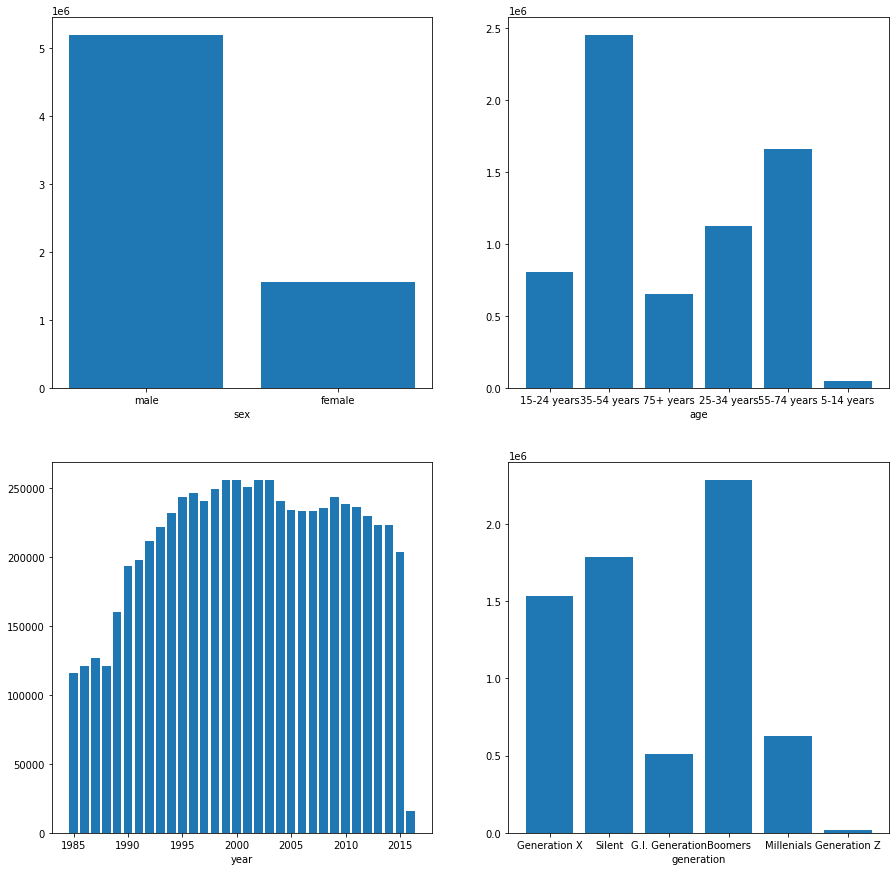

In [15]:
discrete_variables = ['sex','age','year','generation','country']

final_counts = []

fig,ax = plt.subplots(2,2,figsize = (15,15))

#note that all discrete values are plotted with repect to numer of suicides in each value taken by the discrete variable

for j,x in enumerate(discrete_variables):
  my_dict = {}
  for i in range(df.shape[0]):
    if df.iloc[i][x] in my_dict:
      my_dict[df.iloc[i][x]] += df.iloc[i]['suicides_no']
    else:
      my_dict[df.iloc[i][x]] = df.iloc[i]['suicides_no']
  
  final_counts.append(my_dict)
  #I haven't plotted the histogram for country as the number of unique values are very large
  if j==4:
    continue
  ax[j//2][j%2].bar(my_dict.keys(),my_dict.values())  
  ax[j//2][j%2].set_xlabel(x)

plt.show()

#print(df.loc[df['sex']=='female'].shape[0],df.loc[df['sex']=='male'].shape[0])


In [16]:
for i,my_dict in enumerate(final_counts):
  print("mode of " + str(discrete_variables[i]) + " = " + str(max(my_dict,key = my_dict.get)))


mode of sex = male
mode of age = 35-54 years
mode of year = 1999
mode of generation = Boomers
mode of country = Russian Federation


In [17]:
#fixing the gdp_for_year column

def my_func(s):
  #so that the funtion runs without error even after the column is changed once
  if (type(s))==int:
    return s
  a = s.split(",")
  count = 0
  for i in a:
    #commas after every 1000
    count = 1000*count + int(i)
  return count

#print(my_func("23,345,456,234"))

df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].apply(lambda x: my_func(x))
display(df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,63067077179,2309,Generation Z


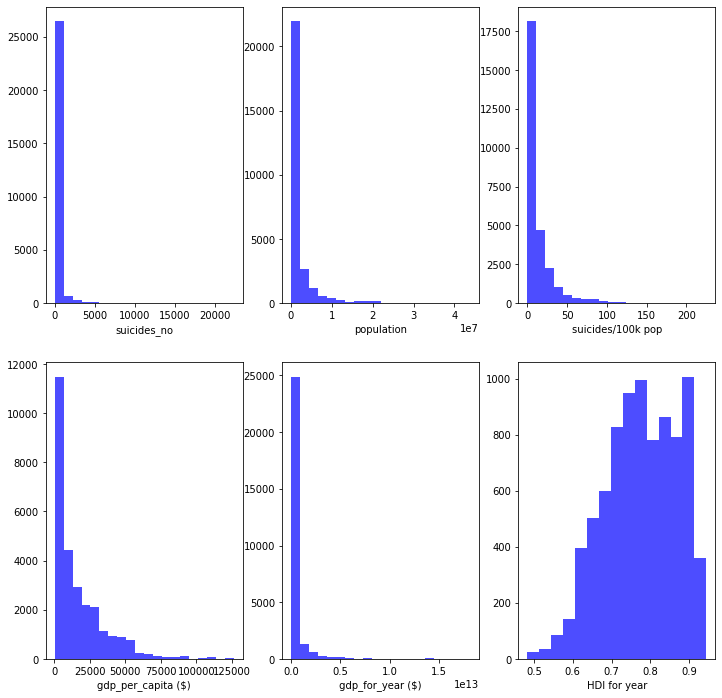

In [18]:
continuous_variables = ['suicides_no','population','suicides/100k pop','gdp_per_capita ($)',' gdp_for_year ($) ','HDI for year']

fig,ax = plt.subplots(2,3,figsize=(12,12))

for i,col in enumerate(continuous_variables):
  if i==len(continuous_variables)-1:
    ax[i//3][i%3].hist(df['HDI for year'].dropna(),bins=15,color=(0.3,0.3,1))
    ax[i//3][i%3].set_xlabel(col)  
    continue
  ax[i//3][i%3].hist(df[col],bins=20,color=(0.3,0.3,1))
  ax[i//3][i%3].set_xlabel(col)

plt.show()

Some key observations that we can make here are as follows, most continuos variables are exponentially distributed. Only HDI is perhaps distributed like a gaussian but is left skewed.<br>
Also note that I haven't plotted year-country as it is unnecessary and haven't plotted country wise as it has too many unique values ($101$)


In [19]:
#finding entropy values for each column
from scipy.stats import entropy

for col in discrete_variables:
  vals = df[col].value_counts()
  entro = entropy(vals)
  print("The entropy of {} is {}".format(col,entro))

The entropy of sex is 0.6931471805599453
The entropy of age is 1.7917561564428144
The entropy of year is 3.4329561237563206
The entropy of generation is 1.695449187635522
The entropy of country is 4.512115046503917


We can onserve from the entropy values that the variables with more number of unique values have higher entropy.


In [20]:
for col in continuous_variables:
  print(col + " Mean = "+str(df[col].mean())+ " variance = "+str(df[col].var())+ " skew = "+ str(df[col].skew()))
  quantiles = df[col].quantile([0.0,0.25,0.50,0.75,1])
  a = ""
  for x in quantiles:
    a += " " + str(x)
  print("Quantiles are : " + a + "\n")

suicides_no Mean = 242.57440690150972 variance = 813690.4442639275 skew = 10.352910335856805
Quantiles are :  0.0 3.0 25.0 131.0 22338.0

population Mean = 1844793.6173975556 variance = 15302018400947.766 skew = 4.459414421535874
Quantiles are :  278.0 97498.5 430150.0 1486143.25 43805214.0

suicides/100k pop Mean = 12.816097411933894 variance = 359.53889995312005 skew = 2.963414476605633
Quantiles are :  0.0 0.92 5.99 16.62 224.97

gdp_per_capita ($) Mean = 16866.464414090584 variance = 356740544.99342066 skew = 1.9634699942792686
Quantiles are :  251.0 3447.0 9372.0 24874.0 126352.0

 gdp_for_year ($)  Mean = 445580969025.7271 variance = 2.1129819912271505e+24 skew = 7.233755024143678
Quantiles are :  46919625.0 8985352832.0 48114688201.0 260202429150.0 18120714000000.0

HDI for year Mean = 0.7766011477761785 variance = 0.008717342272985932 skew = -0.30087744889575657
Quantiles are :  0.483 0.713 0.779 0.855 0.9440000000000001



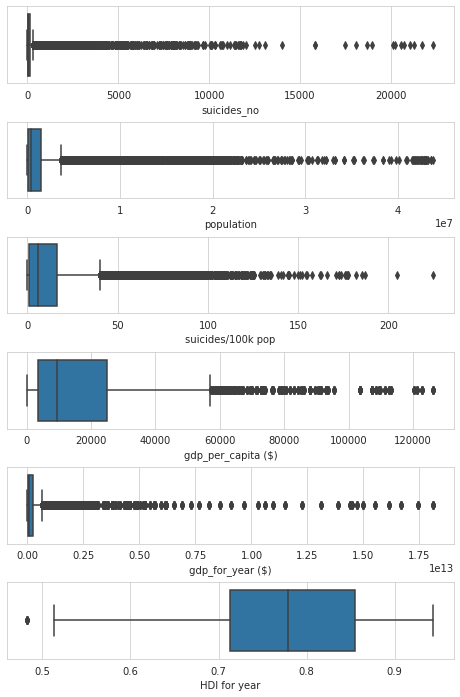

In [22]:
fig,ax = plt.subplots(len(continuous_variables),1,figsize = (8,12))
fig.subplots_adjust(hspace=.5)

sns.set_style('whitegrid')
for i,col in enumerate(continuous_variables):
  sns.boxplot(df[col],ax = ax[i])
  ax[i].set_xlabel(col)

plt.show()

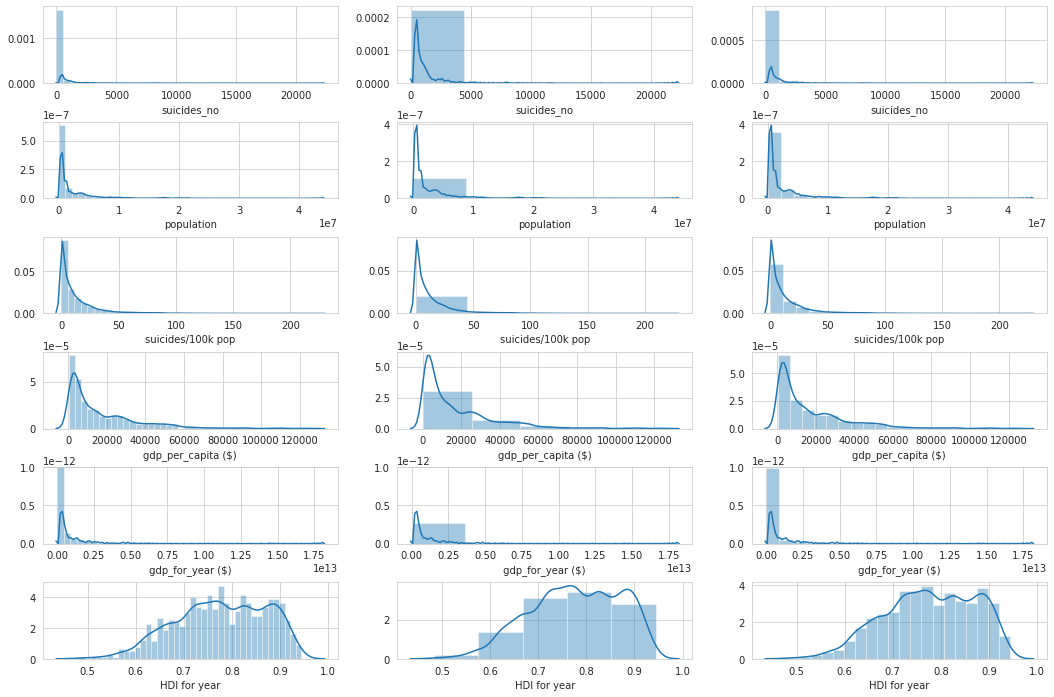

In [24]:
fig,ax = plt.subplots(len(continuous_variables),3,figsize = (18,12))
fig.subplots_adjust(hspace=.5)

for i,col in enumerate(continuous_variables):
  #too many
  sns.distplot(df[col],bins = 40,ax=ax[i][0])
  #too few
  sns.distplot(df[col],bins = 5,ax=ax[i][1])
  #just right
  sns.distplot(df[col],bins = 20,ax=ax[i][2])
  #please take note of scaling of axes
fig.show()



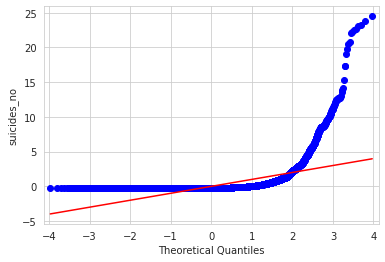

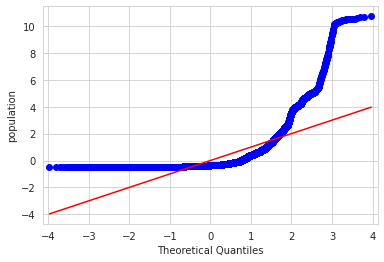

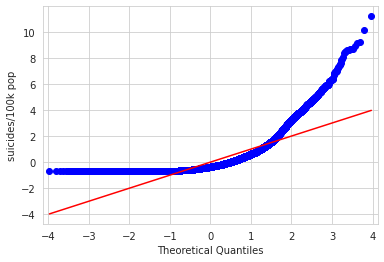

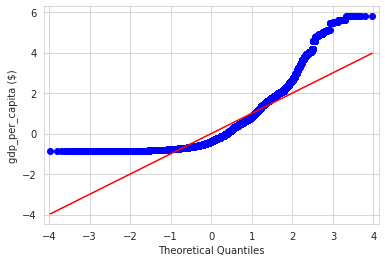

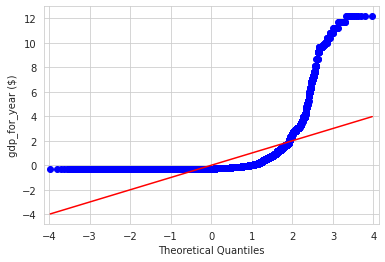

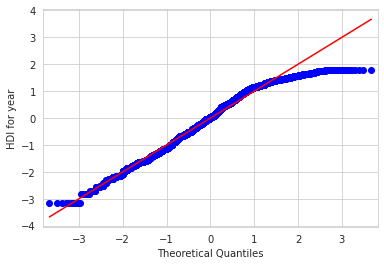

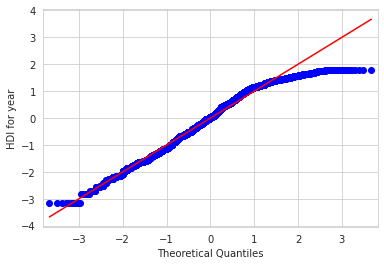

In [25]:
import statsmodels.api as sm

def normalize(sigma,mean,x):
  return (x-mean)/sigma

continuous_variables.append('HDI for year')
for i,col in enumerate(continuous_variables):
  fig = sm.qqplot((df[col].dropna()).apply(lambda x: normalize(df[col].dropna().std(),df[col].dropna().mean(),x)),line = 's')
  plt.ylabel(col)
  plt.show()

continuous_variables.pop(len(continuous_variables)-1);

Most variables seem to be exponentially distributed except HDI for year whose curve is approximately a straight line indicating that the distribution is like a normal distribution. Note that all exponentially distributed variables are right skewed which can also be onserved from the box plots of these variables. To check if the first 5 variables are actually exponentially distributed or log-normal distribution we'll have to plot the qqplot of the lof of the series.

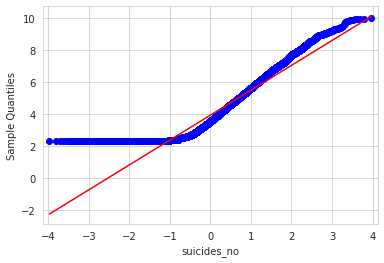

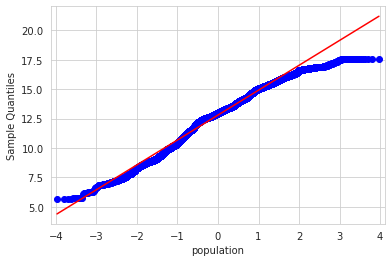

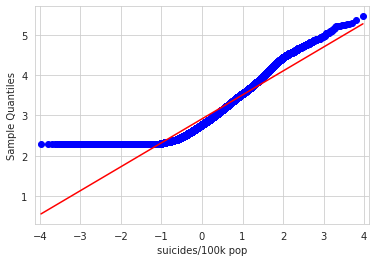

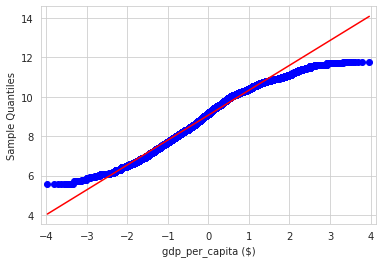

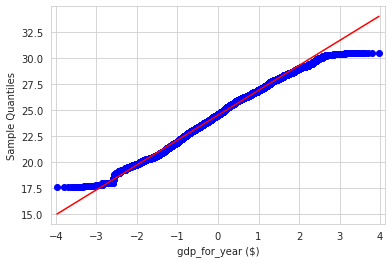

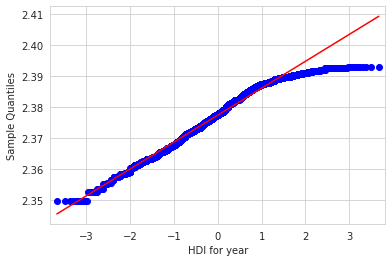

In [27]:
import statsmodels.api as sm

for i,col in enumerate(continuous_variables):
  fig = sm.qqplot(np.log(np.array(df[col].dropna())+10),line = 's')
  plt.xlabel(col)
  plt.show()


From the plots we can see that population and gdp (both per capita and annual) are log-normal distributed.

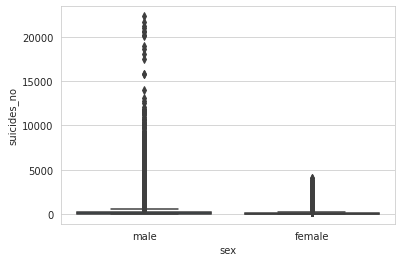

In [28]:
#for this part I've considered sex and generation as the discrete variable and suicide number and
#population as the continuos variables respectively.

import seaborn as sns

sns.boxplot(x=df['sex'],y=df['suicides_no'])

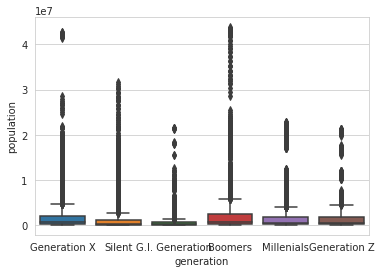

In [29]:
sns.boxplot(x=df['generation'],y=df['population'])

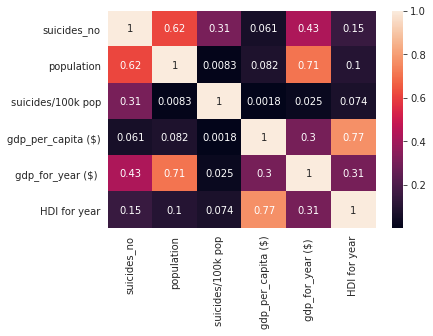

In [30]:
corr = df[continuous_variables].corr()

sns.heatmap(corr, annot=True)
plt.show()

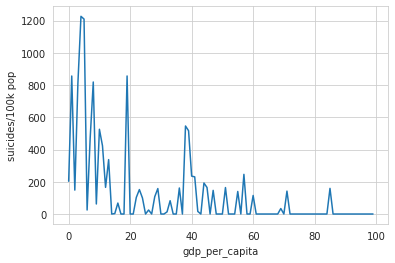

In [32]:
#part e
arr = np.zeros(100)

for i in range(df.shape[0]):
  if df.iloc[i]['year'] == 2005:
    arr[df.iloc[i]['gdp_per_capita ($)']//1000] += df.iloc[i]['suicides/100k pop']

plt.xlabel('gdp_per_capita')
plt.ylabel('suicides/100k pop')
plt.plot(arr)
plt.show()